## Stock Bot
Okay Im gonna make a DIY stock trading, reinforcment learning bot on my own with preferably only tensorflow, numpy, and padas. I actually have no idea how to do that, sooo lets try it out!

### Planning
I need to have the following items built
- the environment
- the agent
- memory for the agent
- the policy for the agent
- the neural net for the agent

TODO: Train and wth is wrong with the probabilities contain nAn for training

In [1]:
from tensorflow import keras
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import yfinance as yf
import gym_anytrading
from StockTradeEnv import FastTrainingStockTradeEnv
from LowRegulationStockTradeEnv import LowRegulationStockTradeEnv
import quantstats as qs
from stable_baselines3.common.callbacks import CheckpointCallback, EveryNTimesteps
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Input, Activation, Concatenate
from tensorflow.keras.optimizers import Adam
from stable_baselines3 import PPO, A2C
from stable_baselines3.ppo.policies import MlpPolicy as MlpPolicyPPO
from stable_baselines3.a2c.policies import MlpPolicy as MlpPolicyA2C
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.vec_env import DummyVecEnv,SubprocVecEnv,VecEnv
from Utilities import *
from LSTMPolicy import CustomLSTM
import torch
from torch import nn

## Environment
The environment will contain the observable variables:
    -
    -
The environment will contain the avalible actions of:
    -
    -
    -

In [2]:
# Parallel environments
stks = ['kros','nflx']#,'tmus','adct','h','bngo','amzn','nio','fb','gme','work','irbt','upwk','fvrr','rdfn','bynd','etsy','pins','zg','roku','sq','pm','dis','nlok','bio','gbio']
# env = DummyVecEnv([lambda: LowRegulationStockTradeEnv(ticker=stks[i],frame_bound=(100, 100000), window_size=1,initial_balance=25000,verbose=2) for i in range(len(stks))])
df = get_stock_df_from_path("/Users/ryandu_1/Desktop/MachineLearning/Projects/Stocks/Sequential Forecasting/Data/Huge Stock Market Dataset/Stocks/nflx.us.txt")
env = LowRegulationStockTradeEnv(df=df,frame_bound=(100, 100000), window_size=1,initial_balance=25000,verbose=2)

/Users/ryandu_1/miniforge3/envs/tfenv/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [3]:
policy_kwargs = dict(
    features_extractor_class=CustomLSTM,
    features_extractor_kwargs=dict(),
)
# model_ppo = PPO(MlpPolicyPPO, env, verbose=0,policy_kwargs=policy_kwargs)
model_a2c = A2C(MlpPolicyA2C, env, verbose=0,policy_kwargs=policy_kwargs)

In [4]:
# model_ppo=model_ppo.learn(20)
model_a2c=model_a2c.learn(100000)

5001.234899999996, shares: 17
       step reward: 1.580149999997957
Step: 640 ----------------------
        Tried to Sell. Unable.
       step reward: -1.9889999999984866
Step: 641 ----------------------
        Tried to Sell. Unable.
       step reward: 2.3978499999990164
Step: 642 ----------------------
        unknown: Held, networth: 25002.764899999995, shares: 17
       step reward: 2.621060000002399
Step: 643 ----------------------
        unknown: Bought 1 stock(s) for:3.84, networth: 25004.781099999997, shares: 18
       step reward: 0.09502999999713212
Step: 644 ----------------------
        unknown: Bought 1 stock(s) for:3.8414, networth: 25004.854199999994, shares: 19
       step reward: 0.03276000000005297
Step: 645 ----------------------
        Tried to Buy. Unable.
       step reward: 0.03705000000045402
Step: 646 ----------------------
        Tried to Sell. Unable.
       step reward: 1.4449499999987894
Step: 647 ----------------------
        unknown: Held, networth

iters: 985


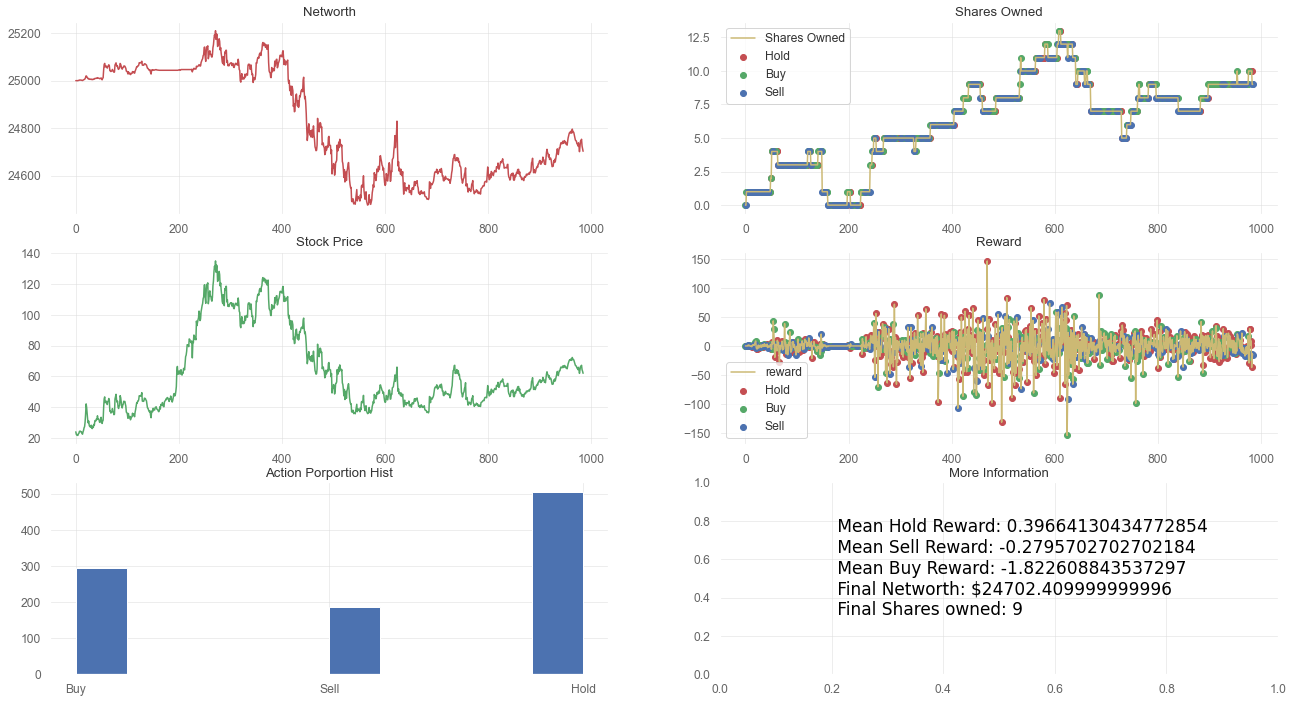

In [6]:
#test on val set
sample_df = get_stock_df_from_path("/Users/ryandu_1/Desktop/MachineLearning/Projects/Stocks/Sequential Forecasting/Data/Huge Stock Market Dataset/Stocks/agio.us.txt")
env_a = eval_model_low_reg(stk_ticker=None,df=sample_df,model=model_a2c,verbose=0)
fig_a = plot_history(env_a.history,(22, 12)) 

iters: 3100


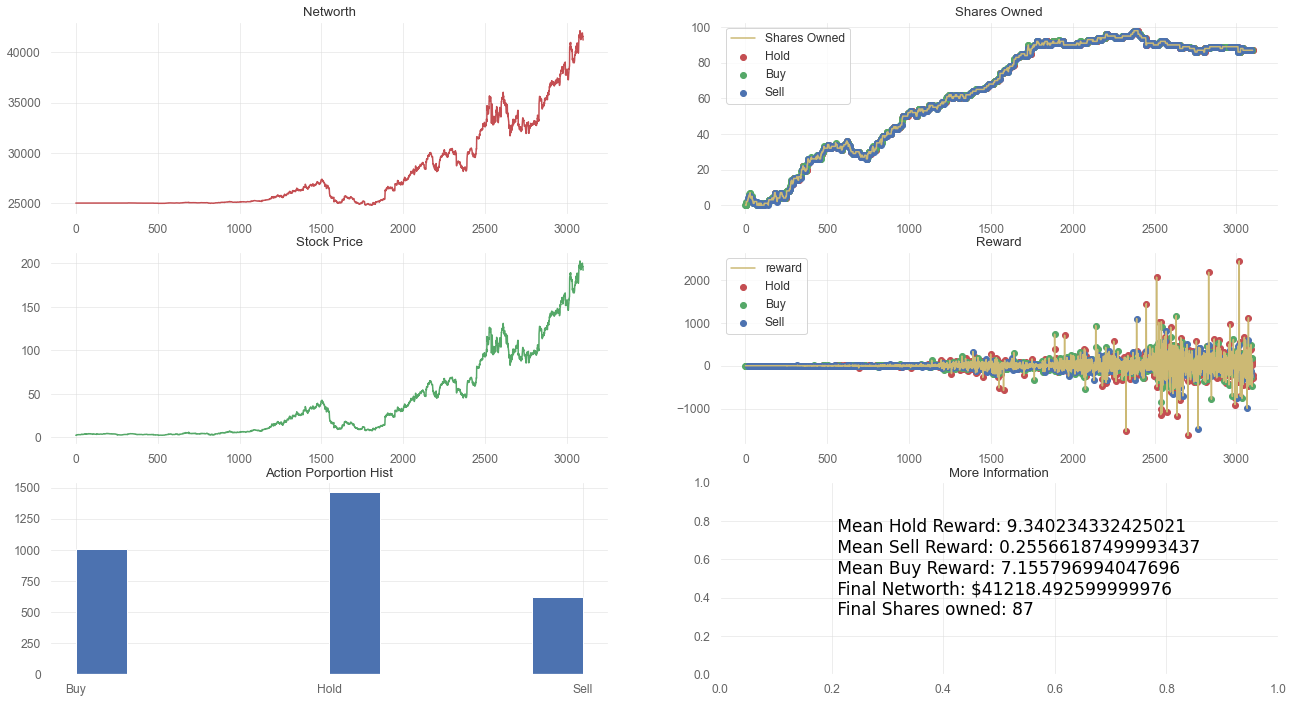

In [5]:
#test on train set
sample_df = get_stock_df_from_path("/Users/ryandu_1/Desktop/MachineLearning/Projects/Stocks/Sequential Forecasting/Data/Huge Stock Market Dataset/Stocks/nflx.us.txt")
env_a = eval_model_low_reg(stk_ticker=None,df=sample_df,model=model_a2c,verbose=0)
fig_a = plot_history(env_a.history,(22, 12)) 